In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
def read_file(filename):
    img = cv2.imread(filename)
    return img

In [4]:
img_normal = read_file(filename='../data/scrubbs.jpg')

In [5]:
def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()

In [6]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [7]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

### Original Image

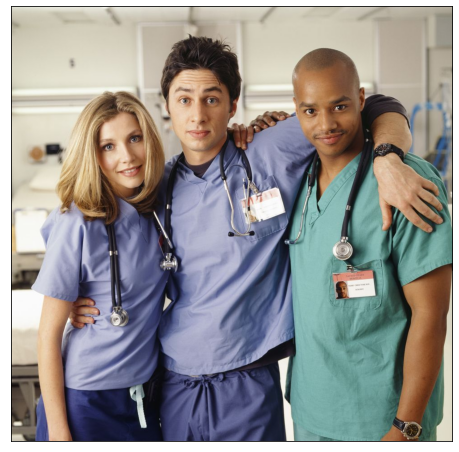

In [8]:
plot_image(img_normal)

### Cartoon Effect

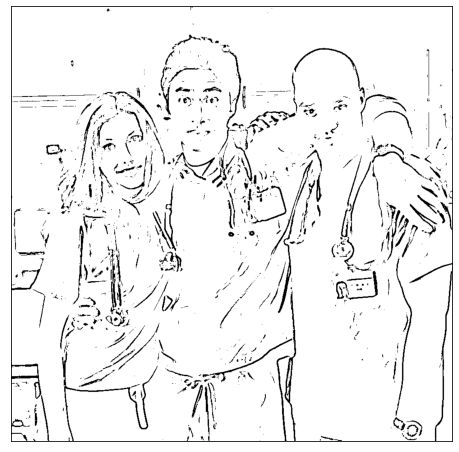

In [10]:
line_size = 7
blur_value = 7

img_edges = edge_mask(img_normal, line_size, blur_value)
plot_image(img_edges)

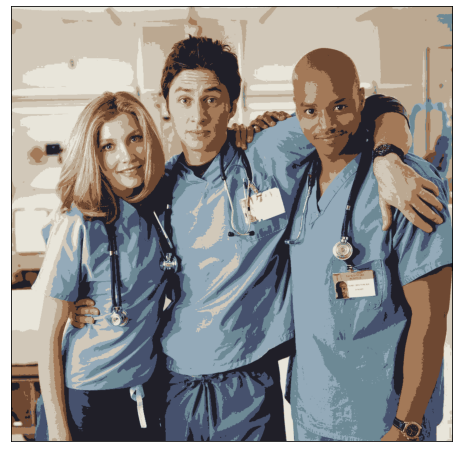

In [11]:
total_color = 9

img_quant = color_quantization(img_normal, total_color)
plot_image(img_quant)

### Blurred

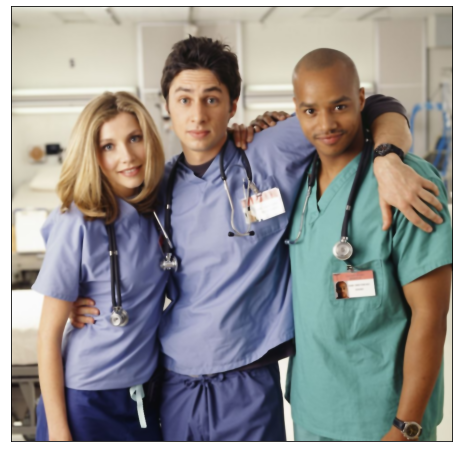

In [14]:
img_blurred = cv2.bilateralFilter(img_normal, d=7, sigmaColor=200, sigmaSpace=200)
plot_image(img_blurred)

### Bitwise And

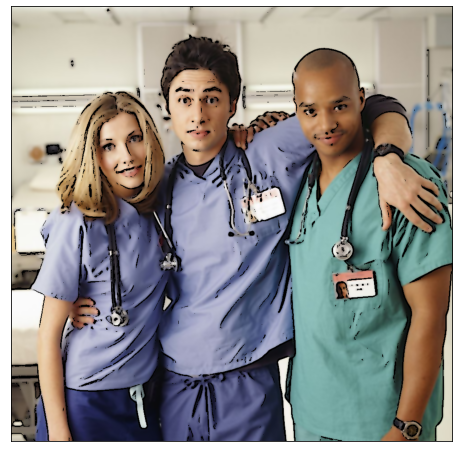

In [17]:
img_cartoon = cv2.bitwise_and(img_blurred, img_blurred, mask=img_edges)
plot_image(img_cartoon)